## Midwest Traffic Accidents Linear Regression Analysis

### Contents

#### 01 Import Libraries and Data
#### 02 Data Cleaning
#### 03 Data Preparation for Regression Analysis on Temperature and Visibility
#### 04 Regression Analysis on Temperature and Visibility
#### 05 Data Preparation for Regression Analysis on Pressure and Severity
#### 06 Regression Analysis on Pressure and Severity

### 01 Import Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Dispay graphs in notebook
%matplotlib inline

In [3]:
# Dispay all columns
pd.set_option('display.max_columns', None)

In [4]:
# Create path variable for main project folder
path = r'D:\JupyterProjects\09-2022 Midwest Accidents Analysis'

In [5]:
# Import accidents data
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'MidwestCleanUpdated.csv'), index_col = False)

### 02 Data Cleaning

In [6]:
df.columns

Index(['Severity', 'Start_Lat', 'Start_Lng', 'Distance(mi)', 'Side', 'City',
       'State', 'Temperature(F)', 'Pressure(in)', 'Visibility(mi)',
       'Weather_Condition', 'Year', 'Date', 'Day', 'Month', 'Day_of_Week',
       'Hour', 'Weekday', 'Weekend', 'State_Accidents', 'Day Category'],
      dtype='object')

In [7]:
df.head()

,Severity,Start_Lat,Start_Lng,Distance(mi),Side,City,State,Temperature(F),Pressure(in),Visibility(mi),Weather_Condition,Year,Date,Day,Month,Day_of_Week,Hour,Weekday,Weekend,State_Accidents,Day Category
0,3,40.108910,-83.092860,3.230,R,Dublin,OH,42.1,29.76,10.0,Rain,2016,2016-02-08,8,2,0,0,1.0,0.0,23725,Weekday
1,2,39.865420,-84.062800,0.747,R,Dayton,OH,36.9,29.68,10.0,Rain,2016,2016-02-08,8,2,0,5,1.0,0.0,23725,Weekday
2,2,39.102660,-84.524680,0.055,R,Cincinnati,OH,36.0,29.70,10.0,Cloudy/Overcast,2016,2016-02-08,8,2,0,6,1.0,0.0,23725,Weekday
3,2,41.062130,-81.537840,0.123,R,Akron,OH,39.0,29.65,10.0,Cloudy/Overcast,2016,2016-02-08,8,2,0,6,1.0,0.0,23725,Weekday
4,3,39.172393,-84.492792,0.500,R,Cincinnati,OH,37.0,29.69,10.0,Rain,2016,2016-02-08,8,2,0,7,1.0,0.0,23725,Weekday


In [8]:
df.shape

(279223, 21)

In [9]:
# Check for missing values
df.isnull().sum()

Severity             0
Start_Lat            0
Start_Lng            0
Distance(mi)         0
Side                 0
City                 0
State                0
Temperature(F)       0
Pressure(in)         0
Visibility(mi)       0
Weather_Condition    0
Year                 0
Date                 0
Day                  0
Month                0
Day_of_Week          0
Hour                 0
Weekday              0
Weekend              0
State_Accidents      0
Day Category         0
dtype: int64

In [10]:
# Check for duplicates
dups = df.duplicated()

In [11]:
dups.shape # No duplicates

(279223,)

D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Pressure(in)', ylabel='Density'>

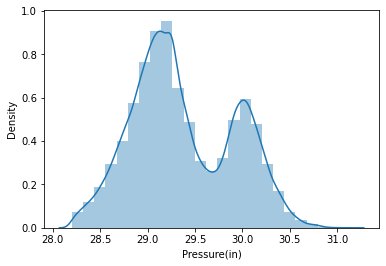

In [12]:
# Check 'Pressure(in) for extreme values
sns.distplot(df['Pressure(in)'], bins=25) 

In [13]:
# Check the mean
df['Pressure(in)'].mean() 

29.372759837118657

In [14]:
# Check the median
df['Pressure(in)'].median()

29.26

In [15]:
# Check the max
df['Pressure(in)'].max()

31.15

In [16]:
# Check the min
df['Pressure(in)'].min()

28.2

D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Temperature(F)', ylabel='Density'>

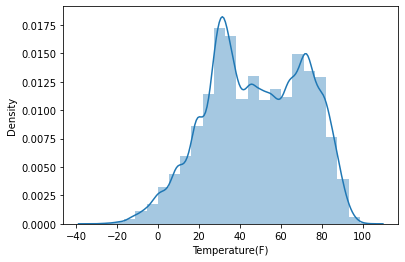

In [17]:
# Check 'Temperature(F)' for extreme values
sns.distplot(df['Temperature(F)'], bins=25) 

In [18]:
# Check the mean
df['Temperature(F)'].mean() 

48.04522944026801

In [19]:
# Check the median
df['Temperature(F)'].median()

48.0

In [20]:
# Check the max
df['Temperature(F)'].max()

104.0

In [21]:
# Check the min
df['Temperature(F)'].min()

-33.0

D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Visibility(mi)', ylabel='Density'>

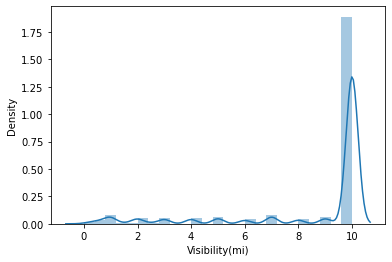

In [22]:
# Check 'Visibility(mi)' for extreme values
sns.distplot(df['Visibility(mi)'], bins=25) 

In [23]:
# Check the mean
df['Visibility(mi)'].mean() 

8.644390505080182

In [24]:
# Check the median
df['Visibility(mi)'].median()

10.0

In [25]:
# Check the max
df['Visibility(mi)'].max()

10.0

In [26]:
# Check the min
df['Visibility(mi)'].min()

0.0

### 03 Data Preparation for Regression Analysis 

In [27]:
# Create a subset excluding date and accident count variables
sub = df[['Severity','Distance(mi)','Temperature(F)', 'Pressure(in)', 'Visibility(mi)','Weekday', 'Weekend']]

In [28]:
# Create a correlation matrix
sub.corr()

,Severity,Distance(mi),Temperature(F),Pressure(in),Visibility(mi),Weekday,Weekend
Severity,1.000000,0.068398,0.089068,0.309659,0.022516,-0.006416,0.006416
Distance(mi),0.068398,1.000000,-0.023273,-0.016678,-0.041882,-0.013239,0.013239
Temperature(F),0.089068,-0.023273,1.000000,0.010307,0.278980,0.039173,-0.039173
Pressure(in),0.309659,-0.016678,0.010307,1.000000,0.099949,0.138330,-0.138330
Visibility(mi),0.022516,-0.041882,0.278980,0.099949,1.000000,0.039644,-0.039644
Weekday,-0.006416,-0.013239,0.039173,0.138330,0.039644,1.000000,-1.000000
Weekend,0.006416,0.013239,-0.039173,-0.138330,-0.039644,-1.000000,1.000000


Among the variables with stronger correlations are 'Temperature(F)' and 'Visibility(mi)'.  However, at 0.278940, this is only a weak, positive correlation.

Hypothesis:  As 'Temperature(F)' increases, 'Visibility(mi)' increases.

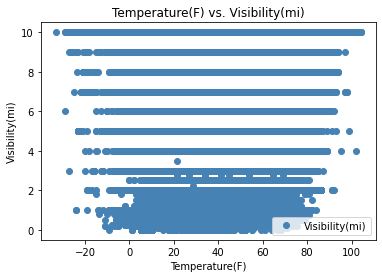

In [29]:
# Create scatterplot of variables using matplotlib to see how variables plot against each other.

df.plot(x = 'Temperature(F)', y = 'Visibility(mi)',style='o',color='steelblue')
plt.title('Temperature(F) vs. Visibility(mi)')  
plt.xlabel('Temperature(F)')  
plt.ylabel('Visibility(mi)')  
plt.show()

In [30]:
# Reshape the variables into NumPy arrays and put them into separate objects

X = df['Temperature(F)'].values.reshape(-1,1)
y = df['Visibility(mi)'].values.reshape(-1,1)

In [31]:
X

array([[42.1],
       [36.9],
       [36. ],
       ...,
       [66. ],
       [65. ],
       [67. ]])

In [32]:
y

array([[10.],
       [10.],
       [10.],
       ...,
       [10.],
       [10.],
       [10.]])

In [33]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 04 Regression Analysis

In [34]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [35]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [36]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

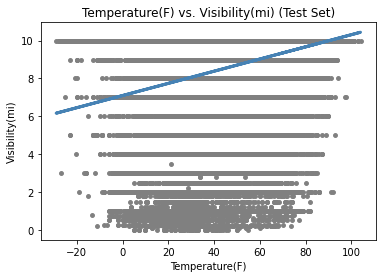

In [37]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='steelblue', linewidth =3)
plot_test.title('Temperature(F) vs. Visibility(mi) (Test Set)')
plot_test.xlabel('Temperature(F)')
plot_test.ylabel('Visibility(mi)')
plot_test.show()

The regression line does not fit the dataset well.

In [38]:
# Create objects that contain the model summary statistics of mean squared error and R2 score
rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted) 

In [39]:
# Print the model summary statistics
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.03214589]]
Mean squared error:  6.987728976847563
R2 score:  0.07889308076130219


In [40]:
y_predicted

array([[9.82582885],
       [8.35033247],
       [9.34685508],
       ...,
       [9.2825633 ],
       [8.9289585 ],
       [9.31470919]])

In [41]:
# Create a dataframe comparing the actual and predicted values of y

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,10.0,9.825829
1,7.0,8.350332
2,10.0,9.346855
3,10.0,9.288992
4,10.0,9.571876
5,10.0,9.443293
6,10.0,7.736346
7,10.0,8.350332
8,5.0,9.186126
9,10.0,7.932436


##### Compare how the regression fits the training set

In [42]:
# Predicting X_train
y_predicted_train = regression.predict(X_train)

In [43]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [44]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.03214589]]
Mean squared error:  7.03328742756502
R2 score:  0.07737022714837838


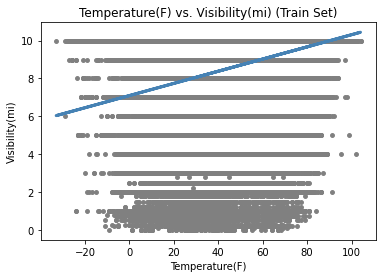

In [45]:
# Visualize training set results

plot_test = plt
plot_test.scatter(X_train, y_train, color='gray', s = 15)
plot_test.plot(X_train, y_predicted_train, color='steelblue', linewidth =3)
plot_test.title('Temperature(F) vs. Visibility(mi) (Train Set)')
plot_test.xlabel('Temperature(F)')
plot_test.ylabel('Visibility(mi)')
plot_test.show()

The model is ineffective for predicting visibility based on temperature.  The slope of 0.032 shows a small increase in visibility as temperature rises.  The root mean squared errors of 6.987 for the test set and 7.033 for the train set shows that the data points are not close to the regression line.  The low R2 scores of .079 for the test set and .077 for the train set also indicate a poor fit.  The data is skewed by the majority of traffic accidents occurring when visibility is 9 - 10 miles.

### 05 Data Preparation for Regression Analysis on Pressure and Severity

'Pressure(in)' and 'Severity' have a moderate, positive correlation of 0.309659.

Hypothesis:  As 'Pressure(in)' increases, 'Severity' increases.

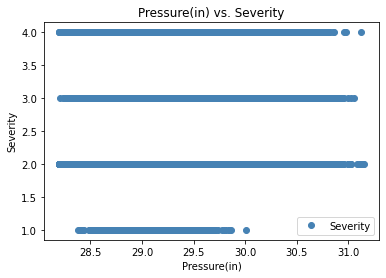

In [46]:
# Create scatterplot of variables using matplotlib to see how variables plot against each other

df.plot(x = 'Pressure(in)', y = 'Severity',style='o',color='steelblue')
plt.title('Pressure(in) vs. Severity')  
plt.xlabel('Pressure(in)')  
plt.ylabel('Severity')  
plt.show()

In [47]:
# Reshape the variables into NumPy arrays and put them into separate objects

X = df['Pressure(in)'].values.reshape(-1,1)
y = df['Severity'].values.reshape(-1,1)

In [48]:
X

array([[29.76],
       [29.68],
       [29.7 ],
       ...,
       [29.42],
       [29.54],
       [29.54]])

In [49]:
y

array([[3],
       [2],
       [2],
       ...,
       [3],
       [3],
       [3]], dtype=int64)

In [50]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 06 Regression Analysis on Pressure and Severity

In [51]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [52]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [53]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

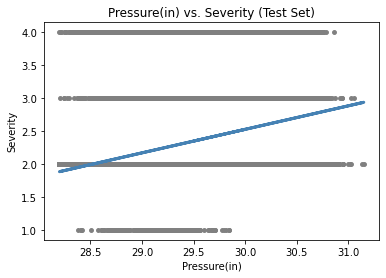

In [54]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='steelblue', linewidth =3)
plot_test.title('Pressure(in) vs. Severity (Test Set)')
plot_test.xlabel('Pressure(in)')
plot_test.ylabel('Severity')
plot_test.show()

In [55]:
# Create objects that contain the model summary statistics of mean squared error and R2 score
rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted) 

In [56]:
# Print the model summary statistics
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.35697863]]
Mean squared error:  0.35841215108900903
R2 score:  0.09926180597348833


In [57]:
# Predicting X_train
y_predicted_train = regression.predict(X_train)

In [58]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [59]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.35697863]]
Mean squared error:  0.3528178269340338
R2 score:  0.09436324969325882


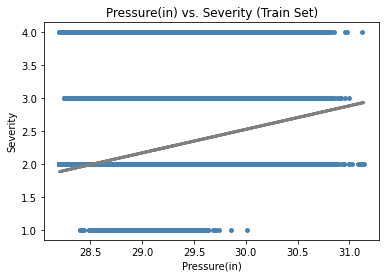

In [60]:
# Visualize training set results

plot_test = plt
plot_test.scatter(X_train, y_train, color='steelblue', s = 15)
plot_test.plot(X_train, y_predicted_train, color='gray', linewidth =3)
plot_test.title('Pressure(in) vs. Severity (Train Set)')
plot_test.xlabel('Pressure(in)')
plot_test.ylabel('Severity')
plot_test.show()

The model is ineffective for predicting severity based on pressure. The slope of 0.357 shows a small increase in severity as pressure increases. The root mean squared errors of 0.358 for the test set and 0.353 for the train set shows that the data points are not close to the regression line. The low R2 scores of 0.099 for the test set and 0.094 for the train set also indicate a poor fit. The data is skewed by the majority of traffic accidents being rated at a 2.